In [1]:
import sys, os, glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy import table

%matplotlib inline
%load_ext autoreload
%autoreload 2

from jwst_kernels.make_kernels import make_jwst_cross_kernel, make_jwst_kernel_to_Gauss,plot_kernel
from jwst_kernels.evaluate_kernels import find_safe_kernel, plot_evaluate

**Example of JWST kernel construction** 

Generate a kernel to go from two arbirtary JWST bands, here choosing MIRI F770W and F2100W.

The JWST PSF can be given to the function via a path, or generated on the fly (if stpsf is installed). 


In [2]:
input_filter = {'camera':'MIRI', 'filter':'F770W'}
target_filter = {'camera':'MIRI', 'filter':'F2100W'}

kk = make_jwst_cross_kernel(input_filter, target_filter, psf_dir=None, outdir=None, detector_effects=True)

no PSF for MIRI F2100W in current directory
generating PSF with webbpsf!
building PSF F2100W


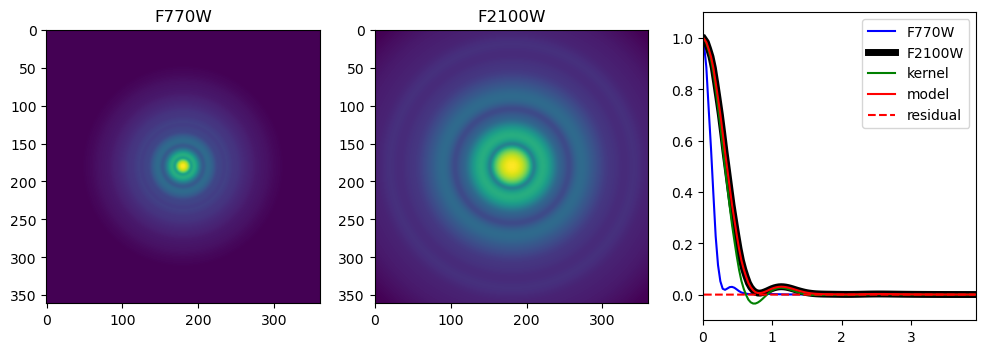

In [4]:
plot_kernel(kk,save_plot=True)

Generate a kernel to go from a JWST band to a Gaussian with an arbitrary PSF. Here doing MIRI F2100W to Gaussian with FWHM of 1.5''.

In [6]:
input_filter = {'camera':'MIRI', 'filter':'F2100W'}
target_gaussian = {'fwhm':1.5}

kk = make_jwst_kernel_to_Gauss(input_filter, target_gaussian,psf_dir=None, outdir=None, detector_effects=True, save_kernel=True)

/Volumes/fbdata3/CODE/JWST/jwst_kernels/src/jwst_kernels/make_kernels.py:186: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow(np.log10(kk.target_psf/np.max(kk.target_psf)), vmax=0, vmin=-4);
/Volumes/fbdata3/CODE/JWST/jwst_kernels/src/jwst_kernels/kernel_core.py:35: RuntimeWarning: invalid value encountered in divide
  bin_means = (np.histogram(dis, bins, weights=psf)[0] /


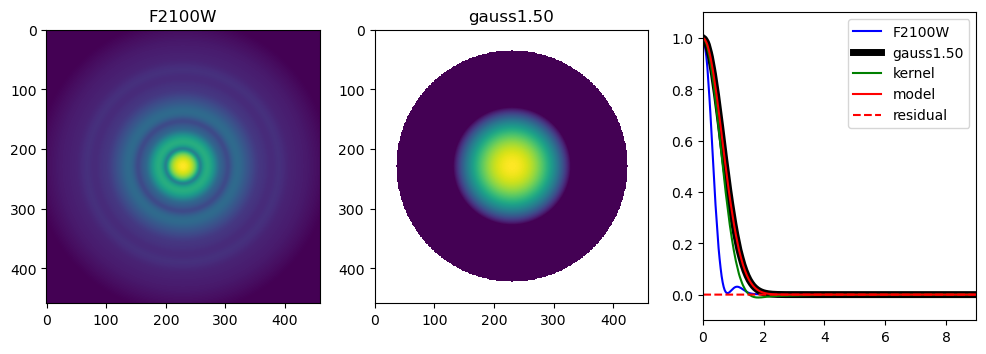

In [7]:
plot_kernel(kk,save_plot=False)

**Determine the smallest "safe" Gaussian PSF for each JWST band** 

Determine the kernel needed to convert to the smallest safe Gaussian PSF according to [Aniano+2011](https://ui.adsabs.harvard.edu/abs/2011PASP..123.1218A/abstract). The results of this analysis for the set of JWST filters is found in Table 2 of [Williams+2024](https://ui.adsabs.harvard.edu/abs/2024ApJS..273...13W/abstract)


Here test the NIRCam F200W filter.

In [2]:
input_filter = {'camera':'NIRCam', 'filter':'F200W'}
out = find_safe_kernel(input_filter, detector_effects=True)

no PSF for NIRCam F200W in current directory
generating PSF with webbpsf!
building PSF F200W


Wm, very safe 0.090", safe 0.078", aggressive 0.069", source 0.064" 
D, very safe 0.03, safe 0.07, aggressive 0.14


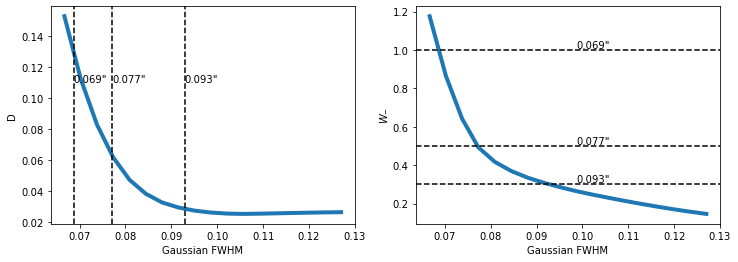

In [31]:
plot_evaluate(out['source_fwhm'], out['target_fwhm'], out['D_v'], out['Wm_v'] )

In [32]:
print(out['very_safe'], out['safe'], out['aggressive'])

0.0928903397437942 0.07714312903104625 0.06868484130471635
